In [1]:
import pandas as pd

In [2]:
with pd.ExcelFile('C:/Users/hp/Desktop/Debby/feed nutrient.xlsx') as xls:
    df1=pd.read_excel(xls, 'Sheet1')
    df2=pd.read_excel(xls, 'Sheet2')

In [3]:
df1.merge(df2)

,farms,% couple_protein,% carbohydrate,% lipid_fat,ammonia,dissolved_oxygen,PH,TDS
0,A,33.47,8.37,5.58,2.25,3.95,6.8,269.5
1,B,26.91,6.73,4.48,3.00,3.80,7.0,354.0
2,C,57.46,11.49,9.58,5.00,4.95,7.0,354.0
3,D,39.67,9.92,6.61,0.50,5.70,7.1,148.5
4,E,31.50,7.88,5.25,1.13,4.40,7.0,248.5
5,F,32.81,8.20,5.47,1.13,3.95,7.1,383.0


In [4]:
import seaborn as sb 
from matplotlib import pyplot as plt

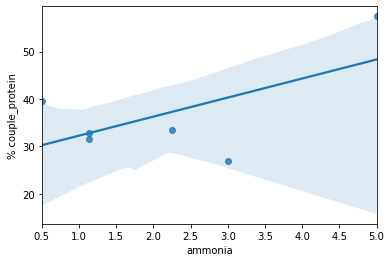

In [5]:
data= df1.merge(df2)
fig5=sb.regplot(x='ammonia',y='% couple_protein', data=data)
fig5.figure.savefig('ammpro.png')

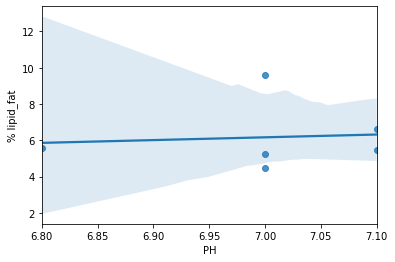

In [6]:
fig4=sb.regplot(x='PH',y='% lipid_fat', data=data)
fig4.figure.savefig('phlip.png')

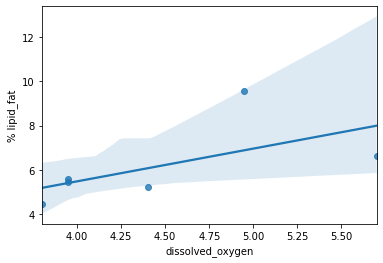

In [7]:
fig3=sb.regplot(x='dissolved_oxygen',y='% lipid_fat', data=data)
fig3.figure.savefig('oxlip.png')

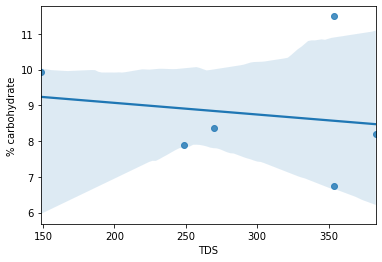

In [8]:
fig2=sb.regplot(x='TDS',y='% carbohydrate', data=data)
fig2.figure.savefig('Tcarbo.png')

<AxesSubplot:xlabel='% carbohydrate', ylabel='% couple_protein'>

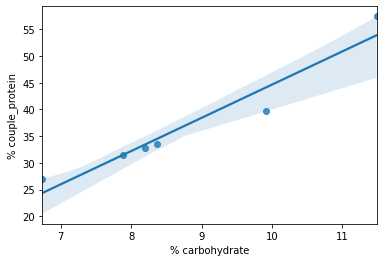

In [9]:
sb.regplot(x='% carbohydrate',y='% couple_protein', data=data)

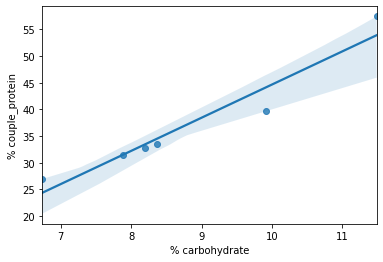

In [10]:
fig1=sb.regplot(x='% carbohydrate',y='% couple_protein', data=data)
fig1.figure.savefig('carbopro.png')

In [11]:
dt=data.describe()
dt[1:3]

,% couple_protein,% carbohydrate,% lipid_fat,ammonia,dissolved_oxygen,PH,TDS
mean,36.970000,8.765000,6.161667,2.168333,4.458333,7.000000,292.916667
std,10.842603,1.682816,1.808971,1.652651,0.739876,0.109545,88.266311


In [12]:
dt=dt[1:3]
dt.to_excel('stdmean.xls')

In [16]:
data

,farms,% couple_protein,% carbohydrate,% lipid_fat,ammonia,dissolved_oxygen,PH,TDS
0,A,33.47,8.37,5.58,2.25,3.95,6.8,269.5
1,B,26.91,6.73,4.48,3.00,3.80,7.0,354.0
2,C,57.46,11.49,9.58,5.00,4.95,7.0,354.0
3,D,39.67,9.92,6.61,0.50,5.70,7.1,148.5
4,E,31.50,7.88,5.25,1.13,4.40,7.0,248.5
5,F,32.81,8.20,5.47,1.13,3.95,7.1,383.0


In [18]:
from sklearn.linear_model import LinearRegression
feat=['% couple_protein','% carbohydrate','% lipid_fat']
x_train=data[feat]
y_train=data['ammonia']
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [19]:
regr.coef_

array([  9.75922219,  -2.65135569, -55.5562905 ])

In [20]:
from sklearn.linear_model import LinearRegression
feat=['% couple_protein','% carbohydrate','% lipid_fat']
x_train=data[feat]
y_train=data['PH']
regr=LinearRegression()
regr.fit(x_train,y_train)
regr.coef_

array([  2.872366  ,   0.06576264, -17.26974925])

In [21]:
from sklearn.linear_model import LinearRegression
feat=['% couple_protein','% carbohydrate','% lipid_fat']
x_train=data[feat]
y_train=data['dissolved_oxygen']
regr=LinearRegression()
regr.fit(x_train,y_train)
regr.coef_

array([  22.4050988 ,    1.11356154, -135.04350668])

In [22]:
from sklearn.linear_model import LinearRegression
feat=['% couple_protein','% carbohydrate','% lipid_fat']
x_train=data[feat]
y_train=data['TDS']
regr=LinearRegression()
regr.fit(x_train,y_train)
regr.coef_

array([-1886.75566468,  -165.44965275, 11459.30995416])

In [33]:
from sklearn.linear_model import LinearRegression
feat=['% couple_protein','% carbohydrate','% lipid_fat']
x_train=data[feat]
y_train=data['% couple_protein']
regr=LinearRegression()
regr.fit(x_train,y_train)
regr.coef_

array([ 1.00000000e+00,  4.26189571e-16, -4.99818044e-13])

In [27]:
data.sem()

% couple_protein     4.426474
% carbohydrate       0.687007
% lipid_fat          0.738509
ammonia              0.674692
dissolved_oxygen     0.302053
PH                   0.044721
TDS                 36.034571
dtype: float64

In [28]:
import statsmodels.api as sm
y=data['% couple_protein']
t=data['ammonia']
model=sm.OLS(y,t)
result=model.fit()
result.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       % couple_protein   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              17.76
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                     0.00837
Time:                        15:09:26   Log-Likelihood:                         -25.835
No. Observations:                   6   AIC:                                      53.67
Df Residuals:                       5   BIC:                                      53.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ammonia       12.7989      3.037      4.215      0.008       4.993      20.605
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.106
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.397
Skew:                           0.104   Prob(JB):                        0.820
Kurtosis:                       1.758   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import statsmodels.api as sm
y=data['% carbohydrate']
t=data['TDS']
model=sm.OLS(y,t)
result=model.fit()
result.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         % carbohydrate   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              39.30
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                     0.00152
Time:                        15:11:41   Log-Likelihood:                         -15.084
No. Observations:                   6   AIC:                                      32.17
Df Residuals:                       5   BIC:                                      31.96
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TDS            0.0276      0.004      6.269      0.002       0.016       0.039
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.674
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.282
Skew:                           0.386   Prob(JB):                        0.868
Kurtosis:                       2.270   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
import statsmodels.api as sm
y=data['% lipid_fat']
t=data['PH']
model=sm.OLS(y,t)
result=model.fit()
result.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            % lipid_fat   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              70.14
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                    0.000397
Time:                        15:13:21   Log-Likelihood:                         -11.502
No. Observations:                   6   AIC:                                      25.00
Df Residuals:                       5   BIC:                                      24.80
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PH             0.8804      0.105      8.375      0.000       0.610       1.151
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.377
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.636
Skew:                           1.269   Prob(JB):                        0.441
Kurtosis:                       3.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
import statsmodels.api as sm
y=data['% lipid_fat']
t=data['dissolved_oxygen']
model=sm.OLS(y,t)
result=model.fit()
result.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            % lipid_fat   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              112.3
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                    0.000129
Time:                        15:14:18   Log-Likelihood:                         -10.166
No. Observations:                   6   AIC:                                      22.33
Df Residuals:                       5   BIC:                                      22.12
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
dissolved_oxygen     1.3842      0.131     10.596      0.000       1.048       1.720
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.889
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.641
Skew:                           1.272   Prob(JB):                        0.440
Kurtosis:                       3.302   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
import statsmodels.api as sm
y=data['% carbohydrate']
t=data['% couple_protein']
model=sm.OLS(y,t)
result=model.fit()
result.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         % carbohydrate   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              454.2
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                    4.22e-06
Time:                        15:15:15   Log-Likelihood:                         -8.0685
No. Observations:                   6   AIC:                                      18.14
Df Residuals:                       5   BIC:                                      17.93
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
% couple_protein     0.2312      0.011     21.313      0.000       0.203       0.259
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.285
Prob(Omnibus):                    nan   Jarque-Bera (JB):                3.448
Skew:                          -1.764   Prob(JB):                        0.178
Kurtosis:                       4.157   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""